Imports

In [1]:
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

read in data

In [3]:
df = pd.read_csv("kc_house_data.csv")

correlation heatmap to start
this allows us to identify interesting trends to look at more deeply later. 

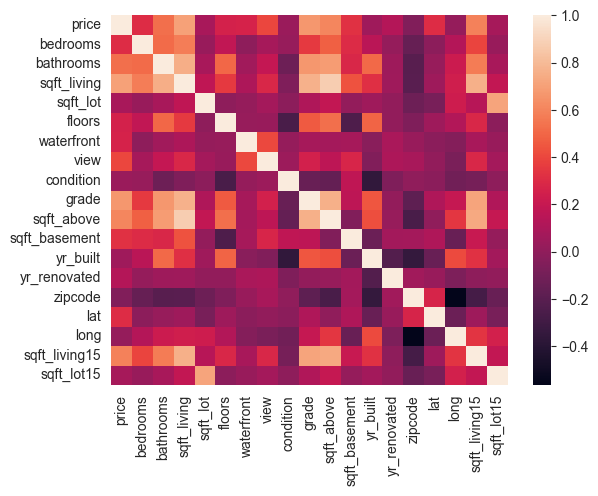

In [4]:
heatmap = df.drop(['id', 'date'], axis = 1)
sns.heatmap(heatmap.corr())
plt.show()

Histogram which shows average housing prices by zipcode. 

{98002: 234284.04, 98168: 240328.37, 98032: 251296.24, 98001: 280804.69, 98148: 284908.6, 98023: 286732.79, 98188: 289078.35, 98003: 294111.28, 98030: 296187.98, 98031: 300539.89, 98198: 302878.88, 98055: 304262.11, 98178: 310612.76, 98042: 311632.11, 98022: 315709.3, 98106: 319581.39, 98092: 334921.06, 98058: 353608.64, 98108: 355678.52, 98146: 359483.24, 98038: 366867.6, 98133: 386997.4, 98118: 417637.43, 98056: 420890.55, 98010: 423665.99, 98155: 423725.7, 98126: 424706.36, 98019: 424788.75, 98045: 439471.08, 98014: 455617.11, 98028: 462480.04, 98166: 464231.84, 98125: 469455.77, 98070: 487479.63, 98011: 490351.47, 98059: 493552.53, 98034: 521652.86, 98065: 527961.2, 98136: 551688.67, 98072: 569958.47, 98117: 576795.01, 98107: 579053.42, 98024: 580526.79, 98103: 584919.21, 98144: 594547.65, 98029: 612653.61, 98027: 616990.59, 98007: 617105.09, 98116: 618634.17, 98115: 619900.55, 98122: 634360.18, 98052: 645231.46, 98008: 645507.38, 98177: 676185.39, 98053: 678163.06, 98077: 682774.8

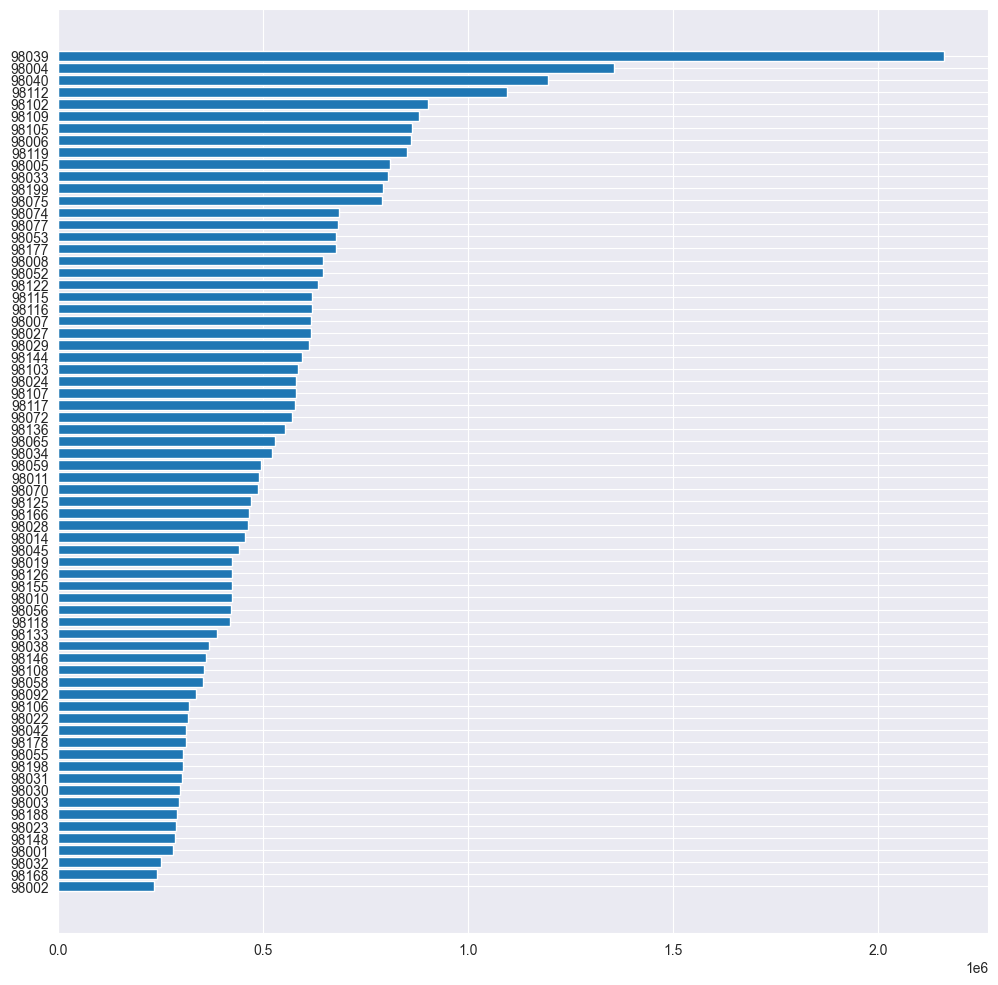

In [48]:
price_dict = dict()

for i in range(len(df)):
    cur_zip = df.at[i, 'zipcode']
    cur_price = df.at[i, 'price']
    # if the current zipcode is not a key, then
    # i must not have seen it before
    if cur_zip not in price_dict:
        price_dict[cur_zip] = 0
    # accumulate price for this bucket
    price_dict[cur_zip] = price_dict[cur_zip] + cur_price

counts = df.value_counts('zipcode')
for key in price_dict:
    price_dict[key] = round(price_dict[key] / counts[key], 2)
    
price_dict = dict(sorted(price_dict.items(), key=lambda x:x[1]))

print(price_dict)
keys = list(price_dict.keys())
values = list(price_dict.values())
x = range(len(keys))
placements = range(5, (len(price_dict)+1)*5, 5)

fig, ax = plt.subplots(figsize = [12, 12])

ax.barh(placements, list(price_dict.values()), height = 4)
ax.set_yticks(placements, keys)

plt.show()

RAHHHH FOLIUM 
Chloropleths that represents various things

Housing price by zip code

imports for chloropleths only

In [50]:
import geopandas as gp
import folium

geojson read in and preprocessing data to key on

In [79]:
geojson = gp.read_file('geometries.geojson')

price_avg = pd.DataFrame(data = {"ZIPCODE":keys, 'avg_price': values})

Creating choropleth

In [82]:
m = folium.Map(location=[47.3436, -121.6990], zoom_start=9)
folium.Choropleth(
    geo_data=geojson,
    name="choropleth",
    data=price_avg,
    columns=["ZIPCODE", "avg_price"],
    key_on="feature.properties.ZIP",
    nan_fill_opacity=0,
    fill_color="OrRd",
    fill_opacity=0.9,
    line_opacity=0.2,
    legend_name="Average cost of house sales",
    bins = [0,300000, 600000, 1000000, 2000000, 3000000]
).add_to(m)

m.save('choropleth.html')